In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

In [2]:
%%file miller_rabin.c

#include <stdio.h>
#include <string.h>
#include <stdlib.h>

int goldbach(long long g);
int primo (long long p,int n);
long long modulo(long long base, long long exponent, long long mod);
long long mulmod(long long a, long long b, long long mod);

int goldbach(long long  g){
    long long  i = 2;
    int n = 5;
    for (long long  j = g-i; j > 2; j--)
    {
        if(primo(i,n) == 1 && primo(j,n) == 1)
        {
            return 1;
        }
        if(i == 2)
        {
        	i++;
        }else
        {
        	i+=2;
        }
        
    }
    return 0;
}

int primo(long long p,int n)
{
 
    int i;
    long long s;
    if (p < 2)
    {
        return 0;
    }
    if (p != 2 && p % 2==0)
    {
        return 0;
    }
     s = p - 1;
    while (s % 2 == 0)
    {
        s /= 2;
    }
    for (i = 0; i < n; i++)
    {
        long long a = rand() % (p - 1) + 1;
        long long temp = s;
        long long mod = modulo(a, temp, p);
        while (temp != p - 1 && mod != 1 && mod != p - 1)
        {
            mod = mulmod(mod, mod, p);
            temp *= 2;
        }
        if (mod != p - 1 && temp % 2 == 0)
        {
            return 0;
        }
    }
    return 1;
}

long long modulo(long long base, long long exponent, long long mod)
{
    long long x = 1;
    long long y = base;
    while (exponent > 0)
    {
        if (exponent % 2 == 1)
            x = (x * y) % mod;
        y = (y * y) % mod;
        exponent = exponent / 2;
    }
    return x % mod;
}
 
long long mulmod(long long a, long long b, long long mod)
{
    long long x = 0,y = a % mod;
    while (b > 0)
    {
        if (b % 2 == 1)
        {    
            x = (x + y) % mod;
        }
        y = (y * 2) % mod;
        b /= 2;
    }
    return x % mod;
}

Overwriting miller_rabin.c


In [3]:
!gcc -c -O2 -o miller_rabin.o miller_rabin.c
!gcc -o libmiller_rabin.so -shared miller_rabin.o

In [4]:
!file libmiller_rabin.so

libmiller_rabin.so: Mach-O 64-bit dynamically linked shared library x86_64


In [5]:
%%file miller_rabin.py

import numpy 
import ctypes

_libmiller_rabin = numpy.ctypeslib.load_library('libmiller_rabin.so', '.')

_libmiller_rabin.goldbach.argtypes = [ctypes.c_longlong]
_libmiller_rabin.goldbach.restype  = ctypes.c_int


def goldbach(num):
    n = _libmiller_rabin.goldbach(num)
    return n

Overwriting miller_rabin.py


In [6]:
%%file fermat.c

#include <stdio.h>
#include <string.h>
#include <stdlib.h>

int goldbach(long long g);
int primo (long long p,int n);
long long modulo(long long base, long long exponent, long long mod);

int goldbach(long long  g){
    long long  i = 2;
    int n = 5;
    for (long long  j = g-i; j > 2; j--)
    {
        if(primo(i,n) == 1 && primo(j,n) == 1)
        {
            return 1;
        }
        if(i == 2)
        {
        	i++;
        }else
        {
        	i+=2;
        }
        
    }
    return 0;
}
int primo(long long p,int n)
{
    if (p < 2)
    {
        return 0;
    }
    if (p != 2 && p % 2==0)
    {
        return 0;
    }
    for (int i = 0; i < n; i++)
    {
        long long a = rand() % (p - 1) + 1; 
        if (modulo(a, p - 1, p) != 1)
        { 
            return 0;
        }
    }
    return 1;
}

long long modulo(long long base, long long exponent, long long mod)
{
    long long x = 1;
    long long y = base;
    while (exponent > 0)
    {
        if (exponent % 2 == 1)
            x = (x * y) % mod;
        y = (y * y) % mod;
        exponent = exponent / 2;
    }
    return x % mod;
}

Overwriting fermat.c


In [7]:
!gcc -c -O2 -o fermat.o fermat.c
!gcc -o libfermat.so -shared fermat.o

In [8]:
!file libfermat.so

libfermat.so: Mach-O 64-bit dynamically linked shared library x86_64


In [9]:
%%file fermat.py

import numpy 
import ctypes

_libfermat = numpy.ctypeslib.load_library('libmiller_rabin.so', '.')

_libfermat.goldbach.argtypes = [ctypes.c_longlong]
_libfermat.goldbach.restype  = ctypes.c_int


def goldbach(num):
    n = _libfermat.goldbach(num)
    return n

Overwriting fermat.py


In [10]:
%%file prime.c

#include <stdio.h>
#include <string.h>
#include <stdlib.h>

int goldbach(long long g);
int primo (long long p);

int goldbach(long long  g){
    long long  i = 2;
    int n = 5;
    for (long long  j = g-i; j > 2; j--)
    {
        if(primo(i) == 1 && primo(j) == 1)
        {
            return 1;
        }
        if(i == 2)
        {
        	i++;
        }else
        {
        	i+=2;
        }
        
    }
    return 0;
}

int primo(long long p)
{
    int flag = 1;
    for (int i = 2; i < p/2; i++)
    {
        if((p%i) == 0){
            return flag-1;
        }
    }
    return flag;
}

Overwriting prime.c


In [11]:
!gcc -c -O2 -o prime.o prime.c
!gcc -o libprime.so -shared prime.o

In [12]:
!file libprime.so

libprime.so: Mach-O 64-bit dynamically linked shared library x86_64


In [13]:
%%file prime.py

import numpy 
import ctypes

_libprime = numpy.ctypeslib.load_library('libmiller_rabin.so', '.')

_libprime.goldbach.argtypes = [ctypes.c_longlong]
_libprime.goldbach.restype  = ctypes.c_int


def goldbach(num):
    n = _libprime.goldbach(num)
    return n

Overwriting prime.py


In [16]:
import miller_rabin
import fermat
import prime

In [18]:
max = 10000000
min = 1000000

In [19]:
mx=np.arange(min,max,2)
my=np.arange(len(mx))
for i in range(len(mx)):
    start = time.time()
    miller_rabin.goldbach(mx[i])
    end = time.time()
    my[i]=abs(start-end)*1000

In [20]:
fx=np.arange(min,max,2)
fy=np.arange(len(fx))
for i in range(len(fx)):
    start = time.time()
    fermat.goldbach(fx[i])
    end = time.time()
    fy[i]=abs(start-end)*1000

In [21]:
px=np.arange(min,max,2)
py=np.arange(len(px))
for i in range(len(px)):
    start = time.time()
    prime.goldbach(px[i])
    end = time.time()
    py[i]=abs(start-end)*1000

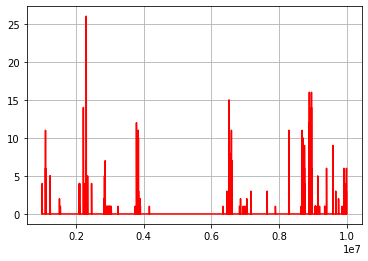

In [28]:
plt.plot(mx,my,'-r')
plt.grid(True)

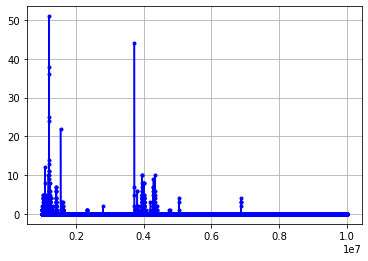

In [33]:
plt.plot(fx,fy,'.-b')
plt.grid(True)
#plt.axis([min,max,0,1])

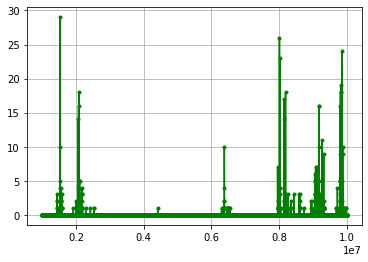

In [31]:
plt.plot(px,py,'.-g')
plt.grid(True)

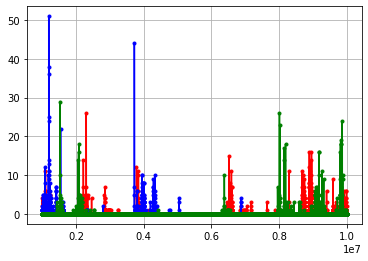

In [30]:
plt.plot(mx,my,'.-r')
plt.plot(fx,fy,'.-b')
plt.plot(px,py,'.-g')
plt.grid(True)